In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision. datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# MNIST train, test dataset 가져오기

In [3]:
# "": 현재 폴더에 MNIST 있음
mnist_train=dset.MNIST("", train=True, transform=transforms.ToTensor(), # train용
                      target_transform=None, download=True)
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(), # test용
                      target_transform=None, download=True)

# 대략적 데이터 형태

mnsit_train 길이:  60000
mnsit_test 길이:  10000
image data 형태: torch.Size([1, 28, 28])
label:  5


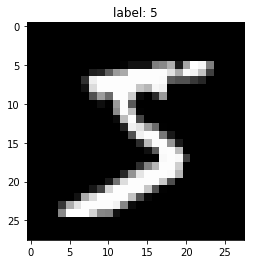

In [4]:
print "mnsit_train 길이: ", len(mnist_train)
print "mnsit_test 길이: ", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

# 그리기
img = image.numpy() # image 타입을 numpy 로 변환 (1, 28, 28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# 데이터 로드함수

In [5]:
# hyper parameters
batch_size = 1024
learning_rate = 0.01
num_epoch = 400

In [6]:
train_loader = torch.utils.data.DataLoader(mnist_train, 
                                           batch_size=batch_size, # mnist_train 를 트레인 시키자
                                           shuffle=True, num_workers=2, 
                                           drop_last=True) # batch_size 만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size,
                                          shuffle=True, num_workers=2,
                                          drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 1024


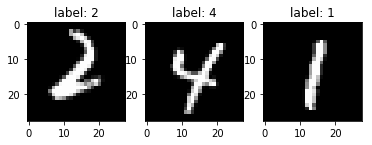

[1]
한 번에 로드되는 데이터 크기: 1024


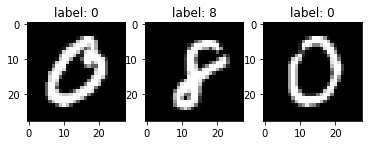

[2]
한 번에 로드되는 데이터 크기: 1024


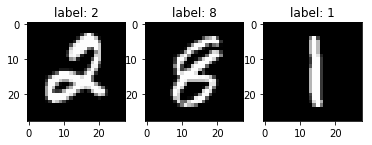

[3]
한 번에 로드되는 데이터 크기: 1024


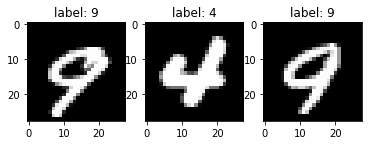

[4]
한 번에 로드되는 데이터 크기: 1024


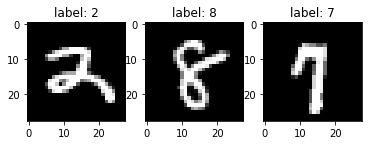

[5]
한 번에 로드되는 데이터 크기: 1024


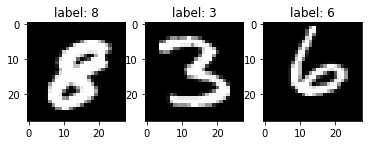

In [7]:
n =3 # 샘플로 그려볼 데이터 개수
for i, [imgs, labels] in enumerate(test_loader): # batch_size 만큼
    if i>5:
        break
        
    print "[%d]" %i
    print "한 번에 로드되는 데이터 크기:", len(imgs)
    
    # 그리기
    for j in range(n):
        img = imgs[j].numpy() # image 타입을 numpy 로 변환 (1, 28, 28)
        img = img.reshape((img.shape[1], img.shape[2])) # (1, 28, 28) -> (28, 28)
        # print img.shape
        
        plt.subplot(1, n, j+1) # (1,3) 형태 플랏의 j번째 자리에 그리겠다
        plt.imshow(img, cmap='gray')
        plt.title("label: %d" %labels[j])
    plt.show()

# 모델선언

In [8]:
# * 퍼셉트론(2 hidden layer) *
model = nn.Sequential(
    nn.Linear(28*28, 256),
    nn.Sigmoid(), # nn.ReLU()
    nn.Linear(256, 128),
    nn.Linear(128, 10),
)
# 파라미터 보기
# print(list(model.parameters())) # 초기 파라미터 출력

In [9]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_size 만큼
        img = imgs # x
        label = Variable(labels) # y
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=False) # requires_grad = False -> forward propogation
        
        output = imodel(img) # forward prop.
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float() # output_index = y^, label = y
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [10]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 10.3624134064


# loss, optimizer

In [11]:
loss_func = nn.CrossEntropyLoss() # logit(# of classes), target(1)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 학습

In [12]:
num_epoch = 400
for i in range(num_epoch):
    for j, [imgs, labels] in enumerate(train_loader): # batch_size 만큼
        img = imgs # (batch_size, 1, 28, 28)
        label = Variable(labels) # (batch_size)
        # (batch_size, 1, 28, 28) -> (batch_size, 28, 28)
        img = img.reshape((img.shape[0], img.shape[2], img.shape[3]))
        # (batch_size, 28, 28) -> (batch_size, 28*28)
        img = img.reshape((img.shape[0], img.shape[1]*img.shape[2]))
        img = Variable(img, requires_grad=True)
        
        optimizer.zero_grad()
        output = model(img) # forward prop.
        loss = loss_func(output, label) # logit(# of classes), target(1)
        
        loss.backward() # back prop.
        optimizer.step() # weight 조정
        
    if i%50==0:
        print("%d.." %i)
        ComputeAccr(test_loader, model)
        print loss

0..
Accuracy of Test Data: 11.3498268127
tensor(2.2917, grad_fn=<NllLossBackward>)
50..
Accuracy of Test Data: 80.772567749
tensor(0.7432, grad_fn=<NllLossBackward>)
100..
Accuracy of Test Data: 88.2269973755
tensor(0.3989, grad_fn=<NllLossBackward>)
150..
Accuracy of Test Data: 90.147567749
tensor(0.3370, grad_fn=<NllLossBackward>)
200..
Accuracy of Test Data: 90.8528671265
tensor(0.3201, grad_fn=<NllLossBackward>)
250..
Accuracy of Test Data: 91.3628463745
tensor(0.3066, grad_fn=<NllLossBackward>)
300..
Accuracy of Test Data: 91.5364608765
tensor(0.3260, grad_fn=<NllLossBackward>)
350..
Accuracy of Test Data: 91.7534713745
tensor(0.3490, grad_fn=<NllLossBackward>)


# 테스트

In [13]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 92.068145752


# 학습된 파라미터 저장

In [14]:
netname = 'mlp_weight.pkl'
torch.save(model, netname, )

# model = torch.load(netname)